<a href="https://www.kaggle.com/code/kemalmaolana/diabetes-probabilistic-analysis?scriptVersionId=134591750" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Diabetes Predictor

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = '/kaggle/input/pima-indians-diabetes-database/diabetes.csv'
df = pd.read_csv(path)
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## To do with zero values

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
def changeZero(data, cols):
    data[cols] = data[cols].replace(0, data[cols].median())
    return data[cols]

cols_with_zero_value = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for col in cols_with_zero_value:
    changeZero(df, col)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.682000,70.920000,26.058000,83.188000,30.880200,0.429734,31.190000
1,4.865672,142.130597,75.123134,29.716418,116.041045,35.381343,0.550500,37.067164


In [9]:
df.groupby('Outcome').agg(['mean', 'median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          3.298000    2.0  110.682000  107.5     70.920000   72.0   
1          4.865672    4.0  142.130597  140.0     75.123134   74.0   

        SkinThickness            Insulin               BMI         \
                 mean median        mean median       mean median   
Outcome                                                             
0           26.058000   23.0   83.188000   39.0  30.880200  30.40   
1           29.716418   27.0  116.041045   30.5  35.381343  34.25   

        DiabetesPedigreeFunction               Age         
                            mean median       mean median  
Outcome                                                    
0                       0.429734  0.336  31.190000   27.0  
1                       0.550500  0.449  37.067164   36.0

## Data correlation to heart disease

In [10]:
correlation = df.corr()

correlation['Outcome'].sort_values()

Insulin                     0.148457
BloodPressure               0.165723
DiabetesPedigreeFunction    0.173844
SkinThickness               0.189065
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.312249
Glucose                     0.492782
Outcome                     1.000000
Name: Outcome, dtype: float64

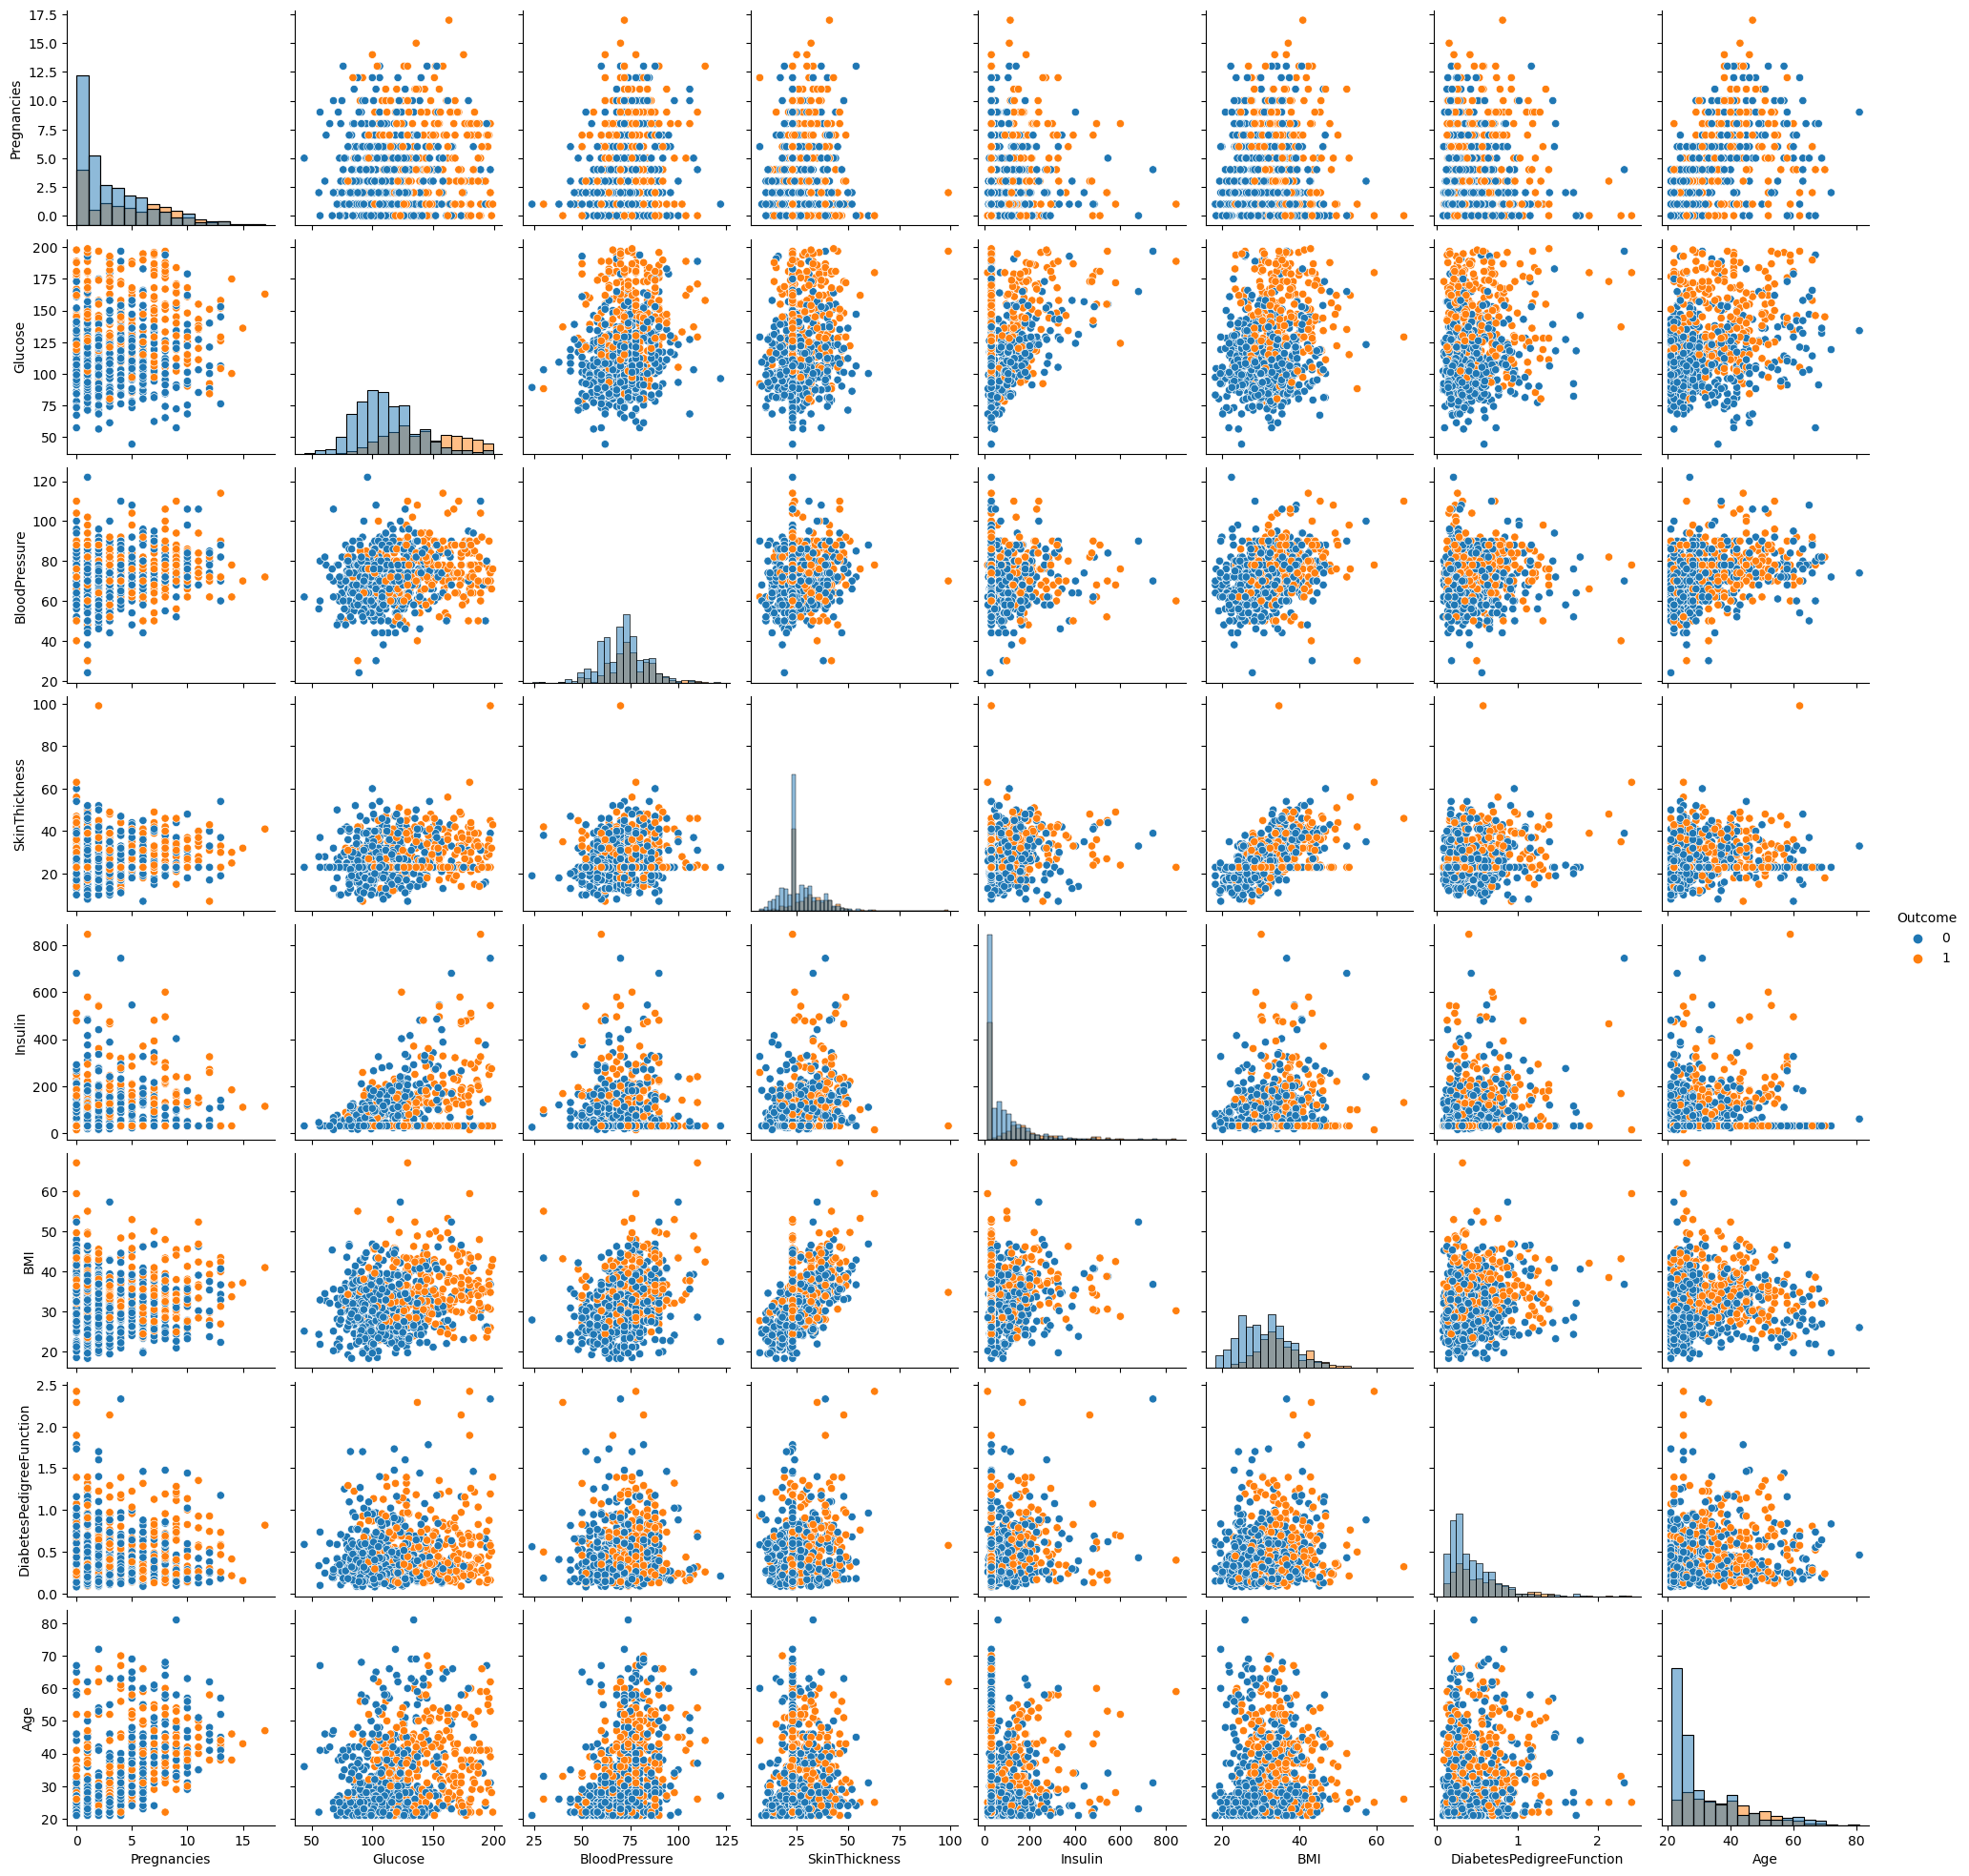

In [11]:
# Correlation each data on dieabetes 
sns.pairplot(df, hue='Outcome', diag_kind='hist')

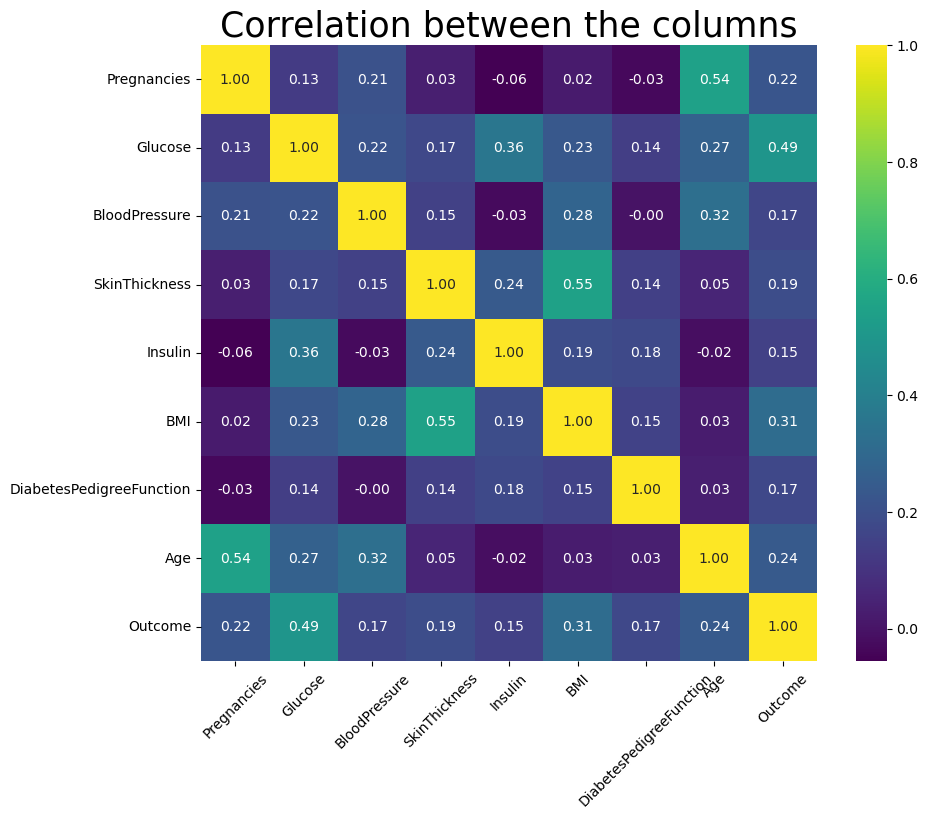

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot = True, square=True, cmap='viridis', fmt='0.2f')
plt.title('Correlation between the columns', fontsize = 25)
plt.xticks(rotation=45)
plt.show()

## Probabilistic Analysis
note: 
- we will note use 'Pregnancies' because we'll not pay attention to gender
- not using 'DiabetesPedigreeFunction' because we dont expect to know its value when they come to a clinic

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
df_analysis = df[['Glucose','BMI', 'Age', 'Outcome']]
df_analysis.shape

(768, 4)

In [15]:
df_y = df_analysis.loc[df_analysis['Outcome'] == 1, ['Glucose','BMI', 'Age']]
df_n = df_analysis.loc[df_analysis['Outcome'] == 0, ['Glucose','BMI', 'Age']]

In [16]:
# import plotly.graph_objects as go 

In [17]:
# fig = go.Figure()
# fig.add_trace(go.Scatter3d(y=df_y['BMI'], x=df_y['Age'], mode='markers', name='Diabetes'))
# fig.add_trace(go.Scatter3d(y=df_n['BMI'], x=df_n['Age'], mode='markers', name='Non-Diabetes'))
# fig.show()

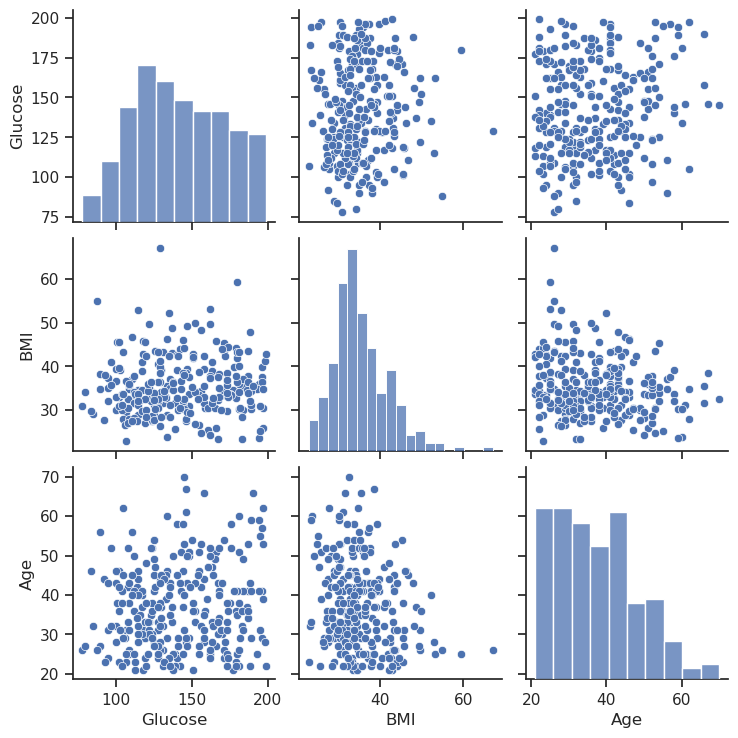

In [18]:
sns.set(style='ticks')
sns.pairplot(df_y, diag_kind='hist')

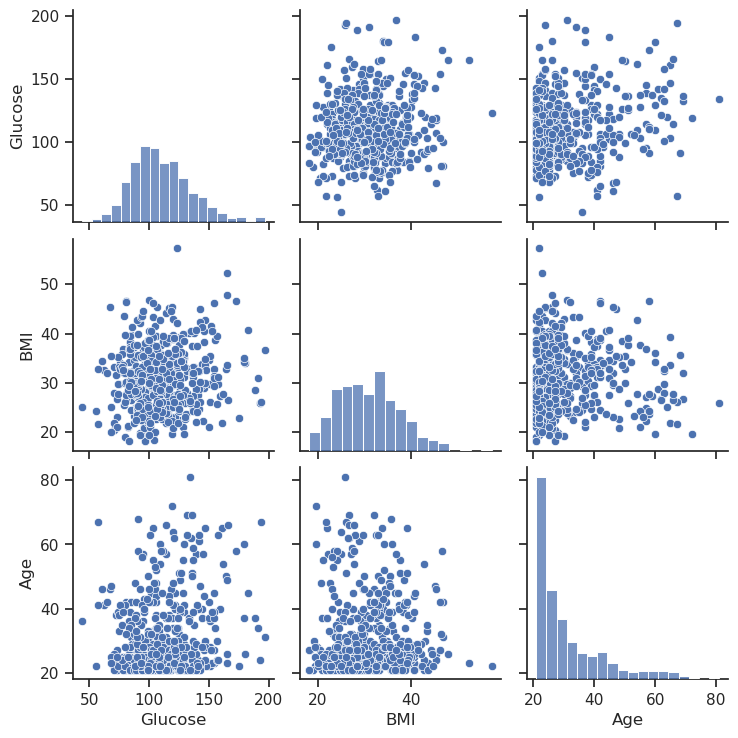

In [19]:
sns.set(style='ticks')
sns.pairplot(df_n, diag_kind='hist')

its not perfect but we can do an alright job approximating both these distribution as Gaussians

## Multivariate Normal distributions

https://en.wikipedia.org/wiki/Multivariate_normal_distribution

In [20]:
from scipy.stats import multivariate_normal as mn

In [21]:
test_point = [100, 35, 52]

In [22]:
prob_test = []

for d in [df_y, df_n]:
    mean = np.mean(d, axis=0)
    cov = np.cov(d, rowvar=0)

    prob = mn.pdf(test_point, mean, cov)
    prob_test.append(prob)

In [23]:
prob_test

[3.2478515325510604e-06, 3.893985610098515e-06]

In [24]:
num_y = df_y.shape[0]
num_n = df_n.shape[0]

print('Number of people with diabetes: ', num_y)
print('Number of people without diabetes: ', num_n)

positive_diagnosis = num_y * prob_test[0] / (num_y * prob_test[0] + num_n * prob_test[1]) 
print(f'Positive diagnosis chance is {100 * positive_diagnosis: .2f}%')

Number of people with diabetes:  268
Number of people without diabetes:  500
Positive diagnosis chance is  30.89%


# Predicting 

## Logistic Regression

In [25]:
df_analysis.head()

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1


In [26]:
X, y = df_analysis.values[:, :-1], df_analysis.values[:, -1]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 42, stratify=y)

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
accuracy = model.score(X_test, y_test)
print("accuracy : ", accuracy * 100,"%")

accuracy :  75.0 %


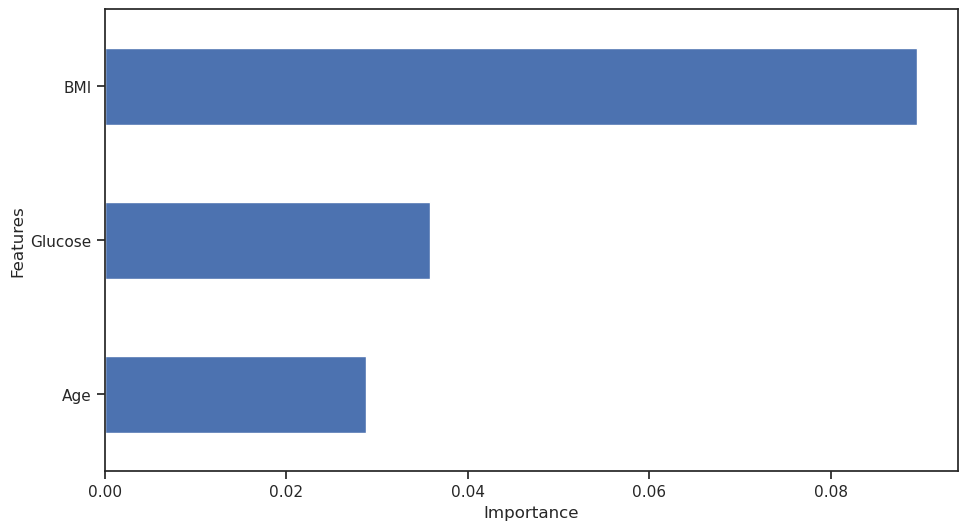

In [30]:
coeff = list(model.coef_[0])
labels = df_analysis.columns[:-1]
features = pd.DataFrame()
features['Features'] = labels
features['Importance'] = coeff

features.sort_values(by=['Importance'], ascending=True, inplace=True)
features['Positive'] = features['Importance'] > 0
features.set_index('Features', inplace=True)
features.Importance.plot(kind='barh', figsize=(11,6))
plt.xlabel('Importance')
plt.show()

In [31]:
features

,Importance,Positive
Features,,
Age,0.028794,True
Glucose,0.035798,True
BMI,0.089506,True


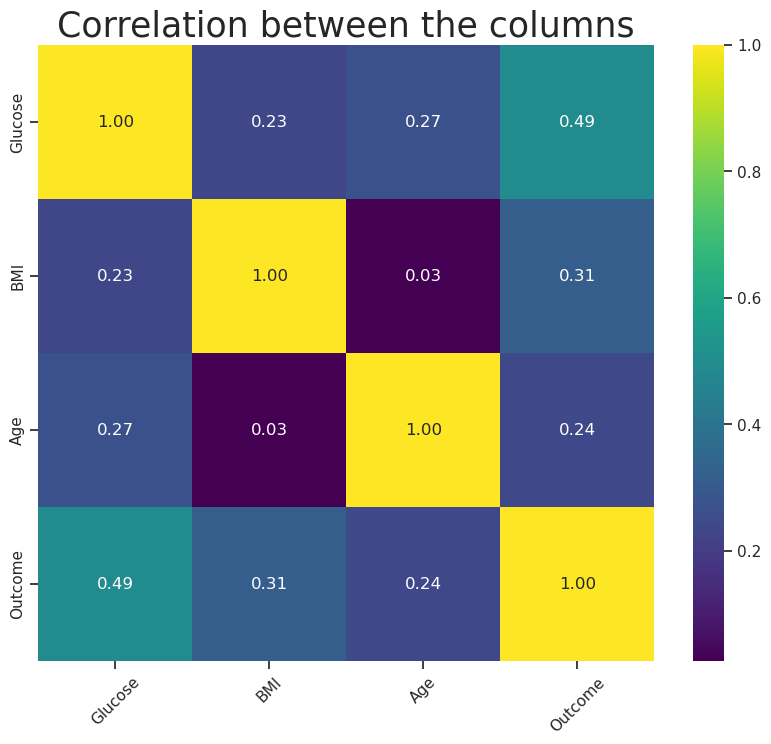

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_analysis.corr(), annot = True, square=True, cmap='viridis', fmt='0.2f')
plt.title('Correlation between the columns', fontsize = 25)
plt.xticks(rotation=45)
plt.show()

## Predicting a new data

In [33]:
import pandas as pd
test_data = pd.DataFrame({
    'Glucose' :100,
    'BMI' :35,
    'Age' :52,
}, index=[0])

In [34]:
model.predict(test_data)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0.])

In [35]:
model.predict_proba(test_data)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[0.69963332, 0.30036668]])

## Result
Logistic Regression result agrees the statistical model (MVN)